In [ ]:
pip install langchain langchain-community langchain-core langgraph langchain-openai

In [8]:
from typing_extensions import TypedDict
class State(TypedDict):
  graph_info : str

In [13]:
def start_paly(state : State):
  print("play start node called")
  return {"graph_info":state["graph_info"]}

def cricket(state : State):
  print("playing cricket node called")
  return {"graph_info":state["graph_info"]}

def football(state : State):
  print("playing football node called")
  return {"graph_info":state["graph_info"]}


In [14]:
from typing import Literal
import random

def random_play(state : State) -> Literal['cricket','football']:
  graph_info = state["graph_info"]

  if random.random() > 0.5:
    return 'cricket'
  else:
    return 'football'

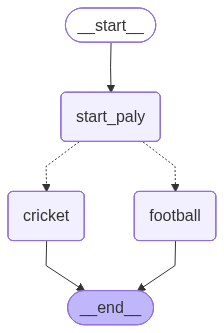

In [15]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

graph = StateGraph(State)

graph.add_node("start_paly",start_paly)
graph.add_node("cricket",cricket)
graph.add_node("football",football)

graph.add_edge(START, "start_paly")
graph.add_conditional_edges("start_paly", random_play)
graph.add_edge("cricket",END)
graph.add_edge("football",END)

graph_builder = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))



In [18]:
graph_builder.invoke({"graph_info":"I am Rama"})

play start node called
playing cricket node called


{'graph_info': 'I am Rama'}